# Importando a base de dados

In [1]:
import pandas as pd
dados = pd.read_csv("database/insurance.csv")
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Pré tratamento dos dados

<Axes: >

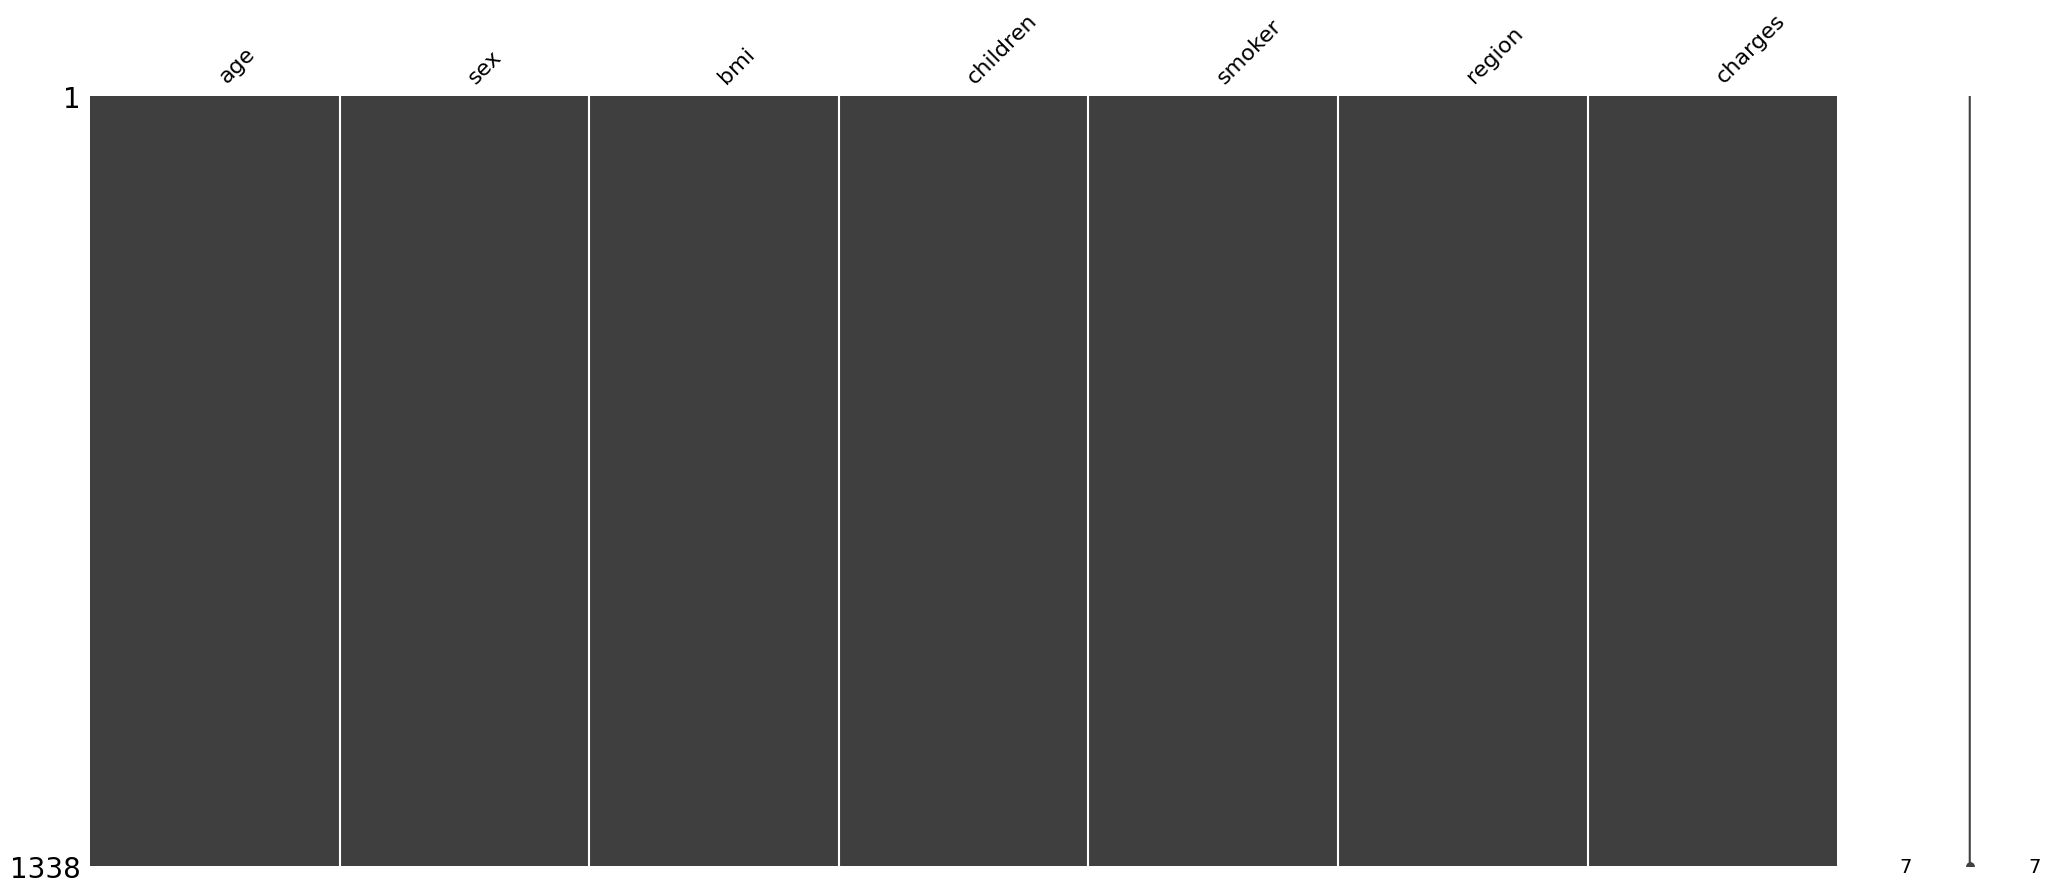

In [2]:
import missingno as msno
msno.matrix(dados)

In [3]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dados['sex'] = encoder.fit_transform(dados['sex'])
dados['smoker'] = encoder.fit_transform(dados['smoker'])
dados['region'] = encoder.fit_transform(dados['region'])

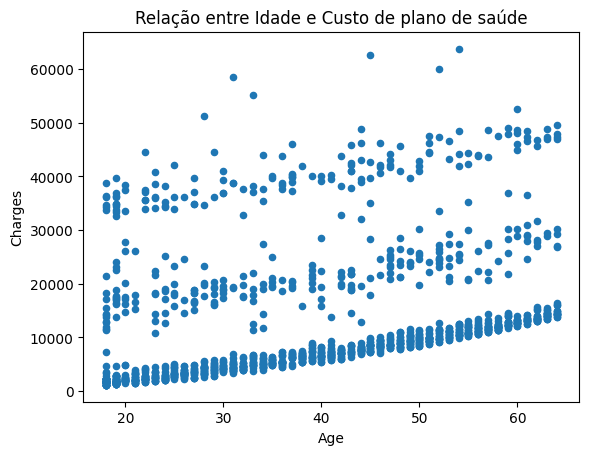

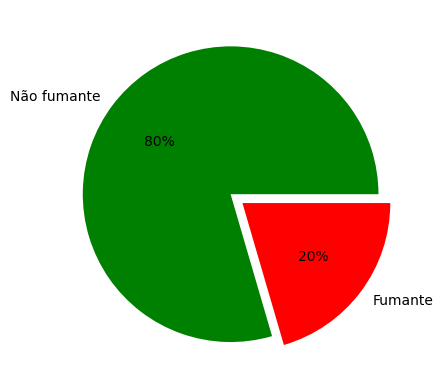

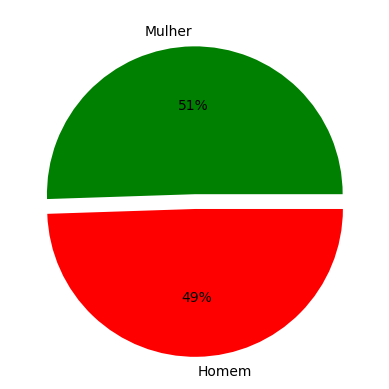

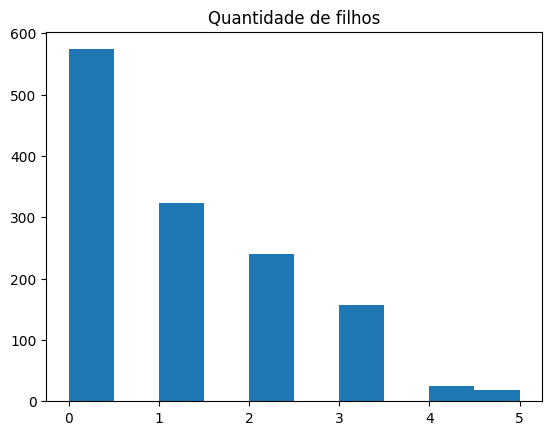

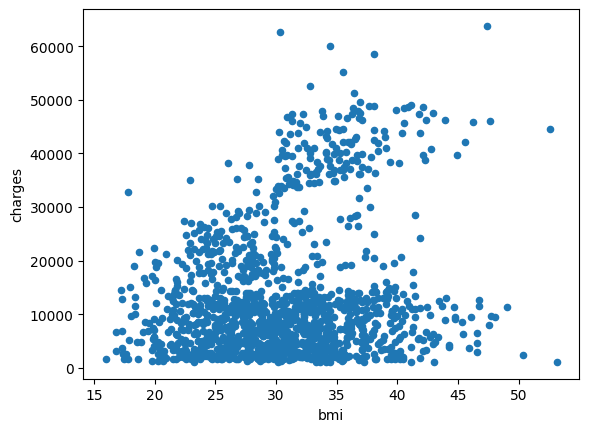

In [5]:
# %load Graphics.py

def generate(dados, plt):

    dados.plot.scatter(x="age", y="charges")
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Relação entre Idade e Custo de plano de saúde')
    plt.show()

    categorias = ["Não fumante", "Fumante"]
    plt.pie(dados["smoker"].value_counts(), labels=categorias, autopct="%0.0f%%", explode=[0, 0.1], colors=("g", "r"))
    plt.show()

    categorias = ["Mulher", "Homem"]
    plt.pie(dados["sex"].value_counts(), labels=categorias, autopct="%0.0f%%", explode=[0, 0.1], colors=("g", "r"))
    plt.show()

    plt.hist(dados["children"])
    plt.title("Quantidade de filhos")
    plt.show()

    dados.plot.scatter(x="bmi", y="charges")
    plt.show()

In [6]:
x = dados.drop(columns=["charges"])
y = dados[["charges"]]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

# Treinamento

In [8]:
# %load TrainningModel.py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def trainModel(x_scaled, y_scaled, plt):

    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
    print("Total base de treino: ", len(x_train))
    print("Total base de teste: ", len(y_test))

    # Usando linear Regression
    modelo_classificador = LinearRegression()
    modelo_classificador.fit(x_train, y_train)
    previsoes = modelo_classificador.predict(x_test)

    # Avaliando o desempenho do modelo
    erro_medio_quadratico = mean_squared_error(y_test, previsoes)
    erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
    r_quadrado = r2_score(y_test, previsoes)

    print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
    print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
    print(f'R² (coeficiente de determinação): {r_quadrado}')

Total base de treino:  1070
Total base de teste:  268
Erro Médio Quadrático: 33635210.431178406
Erro Absoluto Médio: 4186.508898366427
R² (coeficiente de determinação): 0.7833463107364539
